In [1]:
%matplotlib inline

## Lab Assignment Description

#### Download the data and create a well-structured notebook with Markdown headings and notes that describes your process as you:

* Load the data ✅
* Perform some lightweight exploratory data analysis ✅
* Create train/test splits from the data ✅
* Fit at least 5 (but hopefully more) different regression model forms to the train split ✅
* Score all fitted models on your test split (using at least the coefficient of determination) ✅
* Record the best performing regression model in your model selection

#### Models to try:

* Linear Regression (OLS) ✅
* Polynomial Regression ✅ ✅ ✅
* Ridge Regression ✅
* LASSO Regression ❌ - this model does not converge
* ElasticNet Regression ✅
* kNN Regression ✅
* Random Forest Regression ✅
* Gradient Boosting Regression ✅

# Liver Disorder Predictors

Notebook to predict liver disorder given a set of test results.

## Lab Assignment Description


### Notebook Setup

In [2]:
import os 
import sys 

import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

sns.set_context('notebook')
sns.set_style('whitegrid')

## Data Loading

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
liver_disorders = fetch_ucirepo(id=60) 
  
# data (as pandas dataframes) 
X = liver_disorders.data.features 
y = liver_disorders.data.targets 
  
# metadata 
#print(liver_disorders.metadata) 
  
# variable information 
print(liver_disorders.variables) 
print('Measured Liver Values:')
print(X.head())
print('Drinks')
print(y.head())

       name     role         type demographic  \
0       mcv  Feature   Continuous        None   
1   alkphos  Feature   Continuous        None   
2      sgpt  Feature   Continuous        None   
3      sgot  Feature   Continuous        None   
4   gammagt  Feature   Continuous        None   
5    drinks   Target   Continuous        None   
6  selector    Other  Categorical        None   

                                         description units missing_values  
0                            mean corpuscular volume  None             no  
1                               alkaline phosphotase  None             no  
2                           alanine aminotransferase  None             no  
3                         aspartate aminotransferase  None             no  
4                      gamma-glutamyl transpeptidase  None             no  
5  number of half-pint equivalents of alcoholic b...  None             no  
6  field created by the BUPA researchers to split...  None             no  

In [4]:
X.mean()

mcv        90.159420
alkphos    69.869565
sgpt       30.405797
sgot       24.643478
gammagt    38.284058
dtype: float64

In [5]:
from sklearn.model_selection import train_test_split as tts 

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.1, random_state=42)

#### Check for Missing Values
It is important to search for any missing values in our dataset to verify our data is complete. If any missing values are found that needs to be considered and potentially those entries removed prior to modeling.

In [6]:
# Check for missing values in the Liver Disease dataset
print("Missing values in the UCI ML Liver Disease dataset:")
print(X.isnull().sum())
print('size of dataset: ' + str(len(X)))


Missing values in the UCI ML Liver Disease dataset:
mcv        0
alkphos    0
sgpt       0
sgot       0
gammagt    0
dtype: int64
size of dataset: 345


#### Descriptive statistics
Now that we have confirmed our data is complete, let's look at the general statistical summary for our data. This will show us the mean, standard deviation, and may indicate any outliers we have.

In [7]:
# Descriptive statistics for the liver dataset
liver_summary = X.describe()
print(liver_summary)


              mcv     alkphos        sgpt        sgot     gammagt
count  345.000000  345.000000  345.000000  345.000000  345.000000
mean    90.159420   69.869565   30.405797   24.643478   38.284058
std      4.448096   18.347670   19.512309   10.064494   39.254616
min     65.000000   23.000000    4.000000    5.000000    5.000000
25%     87.000000   57.000000   19.000000   19.000000   15.000000
50%     90.000000   67.000000   26.000000   23.000000   25.000000
75%     93.000000   80.000000   34.000000   27.000000   46.000000
max    103.000000  138.000000  155.000000   82.000000  297.000000


#### Vizualizing the data

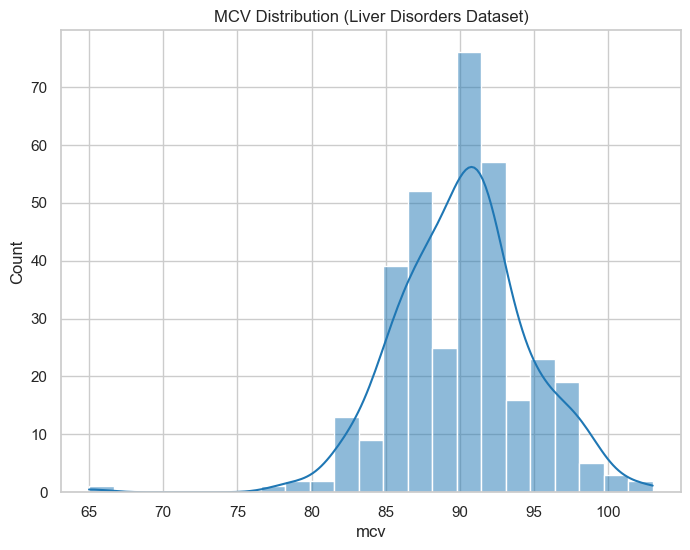

In [8]:
# Visualizing Sepal Length distribution in Iris dataset
plt.figure(figsize=(8, 6))
sns.histplot(X['mcv'], kde=True)
plt.title('MCV Distribution (Liver Disorders Dataset)')
plt.show()

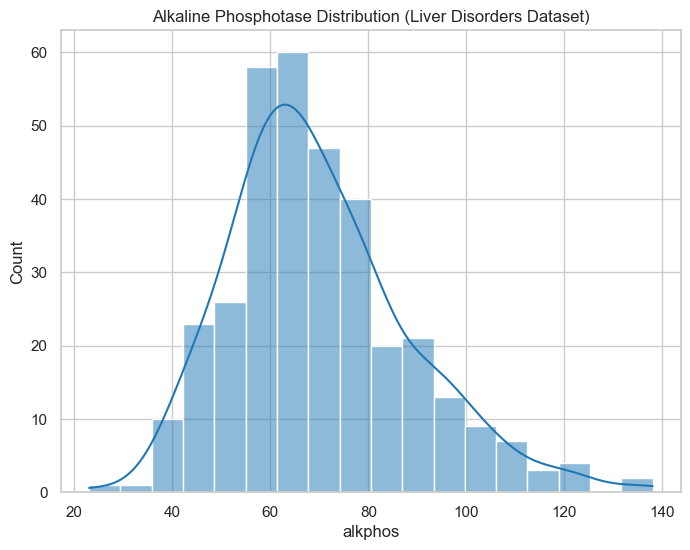

In [9]:
# Visualizing Sepal Length distribution in Iris dataset
plt.figure(figsize=(8, 6))
sns.histplot(X['alkphos'], kde=True)
plt.title('Alkaline Phosphotase Distribution (Liver Disorders Dataset)')
plt.show()

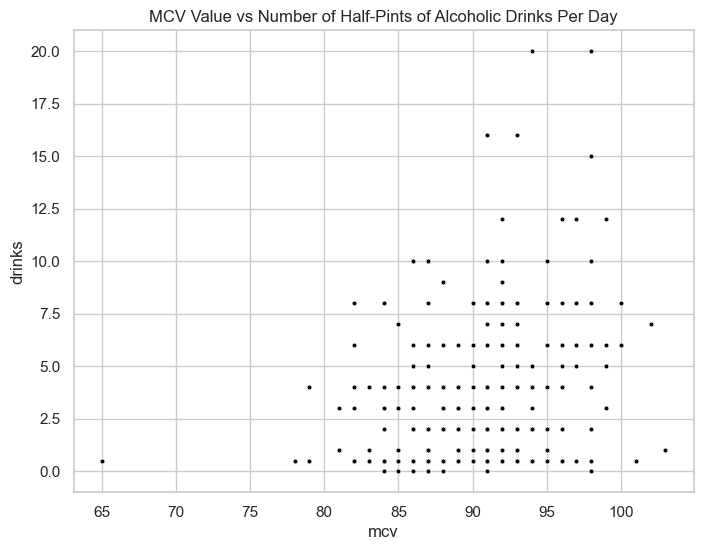

In [10]:
# Scatterplot 
plt.figure(figsize=(8, 6))

# TO-DO: use seaborn to create a scatterplot to visualize the relationship between Median Income and Median House Value
sns.scatterplot(x=X['mcv'], y=y['drinks'], color = 'black', edgecolor='white', marker = '.', s=50)

plt.title('MCV Value vs Number of Half-Pints of Alcoholic Drinks Per Day')
plt.show()


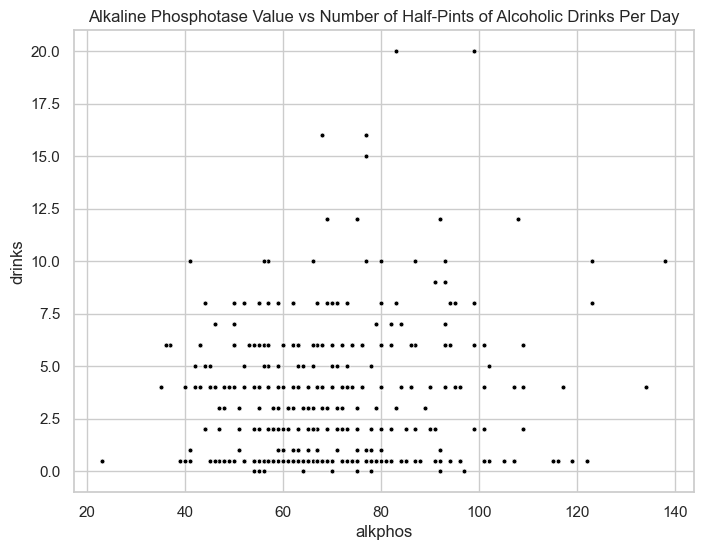

In [11]:
# Scatterplot 
plt.figure(figsize=(8, 6))

# TO-DO: use seaborn to create a scatterplot to visualize the relationship between Median Income and Median House Value
sns.scatterplot(x=X['alkphos'], y=y['drinks'], color = 'black', edgecolor='white', marker = '.', s=50)

plt.title('Alkaline Phosphotase Value vs Number of Half-Pints of Alcoholic Drinks Per Day')
plt.show()

## Do Some Regression 

In [12]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [13]:
# OLS 
from sklearn.linear_model import LinearRegression 

model = LinearRegression() 
model.fit(X_train, y_train)

yhat = model.predict(X_test)

r2 = r2_score(y_test, yhat)
me = mse(y_test, yhat)

print("r2={:0.3f} MSE={:0.3f}".format(r2,me))

r2=0.071 MSE=8.316


In [14]:
# L2 and L1 Regularization 
alphas = np.logspace(-10, 0, 200)

In [15]:
from sklearn.linear_model import RidgeCV 

model = RidgeCV(alphas=alphas) 
model.fit(X_train, y_train)

yhat = model.predict(X_test)

r2 = r2_score(y_test, yhat)
me = mse(y_test, yhat)

print("r2={:0.3f} MSE={:0.3f} alpha={:0.3f}".format(r2,me, model.alpha_))

r2=0.071 MSE=8.316 alpha=1.000


In [16]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3)

gbr.fit(X_train, y_train.values.ravel())

yhat = gbr.predict(X_test)

r2 = r2_score(y_test, yhat)
me = mse(y_test, yhat)

print("r2={:0.3f} MSE={:0.3f}".format(r2,me))

r2=-0.035 MSE=9.262


In [17]:
from sklearn.linear_model import LassoCV 

model = LassoCV(alphas=alphas) 
model.fit(X_train, y_train.values.ravel())

yhat = model.predict(X_test)

r2 = r2_score(y_test, yhat)
me = mse(y_test, yhat)

print("r2={:0.3f} MSE={:0.3f} alpha={:0.3f}".format(r2,me, model.alpha_))

r2=0.092 MSE=8.128 alpha=1.000


In [18]:
from sklearn.linear_model import ElasticNetCV

model = ElasticNetCV(alphas=alphas) 
model.fit(X_train, y_train.values.ravel())

yhat = model.predict(X_test)

r2 = r2_score(y_test, yhat)
me = mse(y_test, yhat)

print("r2={:0.3f} MSE={:0.3f}".format(r2,me))

r2=0.083 MSE=8.203


In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

model = Pipeline([
    ('poly', PolynomialFeatures(2)), 
    ('ridge', RidgeCV(alphas=alphas)),
])

model.fit(X_train, y_train)

yhat = model.predict(X_test)

r2 = r2_score(y_test, yhat)
me = mse(y_test, yhat)

print("r2={:0.3f} MSE={:0.3f} alpha={:0.3f}".format(r2,me, model.named_steps['ridge'].alpha_))

r2=0.119 MSE=7.884 alpha=1.000


In [20]:
model = Pipeline([
    ('poly', PolynomialFeatures(3)), 
    ('ridge', RidgeCV(alphas=alphas)),
])

model.fit(X_train, y_train)

yhat = model.predict(X_test)

r2 = r2_score(y_test, yhat)
me = mse(y_test, yhat)

print("r2={:0.3f} MSE={:0.3f} alpha={:0.3f}".format(r2,me, model.named_steps['ridge'].alpha_))

r2=-2.091 MSE=27.658 alpha=0.499


In [21]:
model = Pipeline([
    ('poly', PolynomialFeatures(4)), 
    ('ridge', RidgeCV(alphas=alphas)),
])

model.fit(X_train, y_train)

yhat = model.predict(X_test)

r2 = r2_score(y_test, yhat)
me = mse(y_test, yhat)

print("r2={:0.3f} MSE={:0.3f} alpha={:0.3f}".format(r2,me, model.named_steps['ridge'].alpha_))

r2=-26466043.823 MSE=236811687.592 alpha=0.793


In [22]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor() 
model.fit(X_train,y_train.values.ravel())

yhat = model.predict(X_test)

r2 = r2_score(y_test, yhat)
me = mse(y_test, yhat)

print("r2={:0.3f} MSE={:0.3f}".format(r2,me))

r2=0.103 MSE=8.024


In [23]:
from sklearn.linear_model import BayesianRidge

model = BayesianRidge() 
model.fit(X_train, y_train.values.ravel())

yhat = model.predict(X_test)

r2 = r2_score(y_test, yhat)
me = mse(y_test, yhat)

print("r2={:0.3f} MSE={:0.3f}".format(r2,me))

r2=0.074 MSE=8.283


In [24]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(5)
model.fit(X_train, y_train)

r2 = r2_score(y_test, yhat)
me = mse(y_test, yhat)

print("r2={:0.3f} MSE={:0.3f}".format(r2,me))

r2=0.074 MSE=8.283


#### The PolynomialFeatures Model did not converge so we removed this from the selected models. 
Code given for posterity:

from sklearn.preprocessing import PolynomialFeatures 
from sklearn.pipeline import Pipeline 

model = Pipeline([
    ('poly', PolynomialFeatures(2)), 
    ('lasso', LassoCV(alphas=alphas, max_iter=10000)),
])

model.fit(X_train,  y_train.values.ravel())

yhat = model.predict(X_test)

r2 = r2_score(y_test, yhat)
me = mse(y_test, yhat)

print("r2={:0.3f} MSE={:0.3f} alpha={:0.3f}".format(r2,me, model.named_steps['lasso'].alpha_))

# Model Evaluation

We have pulled two quality outputs for each model. 

First we have the R² (R-squared) value which denotes how well our model explains any data variance present and ranges from 0-1. Here, 1 indicates 100% match and is ideally what we are aiming for, even though we rarely if ever have a model that 100% explains variance in a dataset. 

Second we have MSE (Mean Squared Error) which gives the average squared difference between predicted and actual values. In this instance we want the lowest number possible. 

Below we compare each of our model results to determine the ideal model for this dataset.

| Model                  | R² Score       | MSE              |
|------------------------|----------------|------------------|
| OLS LinearRegression   | 0.071          | 8.316            |
| RidgeCV                | 0.071          | 8.316            |
| GradBoostingRegressor  | -0.035         | 9.264            |
| LassoCV                | 0.092          | 8.128            |
| ElasticNetCV           | 0.083          | 8.203            |
| Polynomial (2)         | 0.119          | 7.884            |
| Polynomial (3)         | -2.091         | 27.658           |
| Polynomial (4)         | -26466043.823  | 236811687.592    |
| RandomForestRegressor  | 0.084          | 8.193            |
| BayesianRidge          | 0.074          | 8.283            |
| KNeighborsRegressor    | 0.074          | 8.283            |
| LASSO Regression       |DID NOT CONVERGE| DID NOT CONVERGE |

Comparing our results we find that a polynomial with two features has the highest R^2 score and the lowest MSE. Many of the models fall around this area, which shows us that it gives us some indication that blood results and drinks consumed are in some way related. However, most of the models we've tested perform worse than baseline, our dataset may not have strong predictive features. Another issue that may be present is that our dataset may need additional filtering or preprocessing to produce a better result and more meaningful model. 

We can take the best model and see if tweaking the parameters helps us get a better model. 

# Additional Exploration

#### Polynomial (2) - fine tuning

In [28]:
from sklearn.model_selection import GridSearchCV
#let's minimize our alphas
alphas = np.logspace(-5, 5, 100)  

model = Pipeline([
    ('poly', PolynomialFeatures(2)), 
    ('ridge', RidgeCV(alphas=alphas))  
])

param = {'ridge__alphas': [np.logspace(-5, 0, 100)]}

param_search = GridSearchCV(model, param, cv=100, n_jobs=-1, verbose=1, scoring='neg_mean_squared_error')

param_search.fit(X_train, y_train)

best_model = param_search.best_estimator_

yhat = best_model.predict(X_test)

r2 = r2_score(y_test, yhat)
me = mse(y_test, yhat)
print("r2={:0.3f} MSE={:0.3f}".format(r2,me))

Fitting 100 folds for each of 1 candidates, totalling 100 fits
r2=0.119 MSE=7.884


So we have found that our original model was still the best. 